In [4]:
from pathlib import Path

root_dir = str(Path.cwd())

root_dir

'c:\\Users\\admin\\Documents\\Stancars'

In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

In [7]:
import torchvision

weight = torchvision.models.GoogLeNet_Weights.DEFAULT
model_0 = torchvision.models.googlenet(weights=weight).to(device)

In [8]:
import torch

from torchvision import datasets, transforms

# # TRANSFORM = transforms.Compose([
# #     transforms.Resize([224, 224]),
# #     transforms.PILToTensor(),
# #     transforms.ConvertImageDtype(dtype=torch.float32),
# #     transforms.Normalize(mean=[0.485, 0.456, 0.406], 
# #                          std=[0.229, 0.224, 0.225])
# ])

TRANSFORM = weight.transforms()
train_data = datasets.StanfordCars(root=root_dir,
                                   split='train',
                                   transform=TRANSFORM,
                                   download=True)

test_data = datasets.StanfordCars(root=root_dir,
                                   split='test',
                                   transform=TRANSFORM,
                                   download=True)

In [9]:
class_names = train_data.classes

class_names

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi A5 Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi V8 Sedan 1994',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi TT Hatchback 2011',
 'Audi S6 Sedan 2011',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S4 Sedan 2012',
 'Audi S4 Sedan 2007',
 'Audi TT RS Coupe 2012',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW X5 SUV 2007',
 'BMW X6 SUV 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3

In [10]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              )
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False,
                              )

In [11]:
image_batch, label_batch = next(iter(train_dataloader))

image_batch.shape, label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [12]:
len(label_batch)

32

In [13]:
image, label = train_data[0]

image.shape

torch.Size([3, 224, 224])

In [14]:
len(class_names)

196

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Car name: Audi TTS Coupe 2012\n shape: torch.Size([3, 224, 224])')

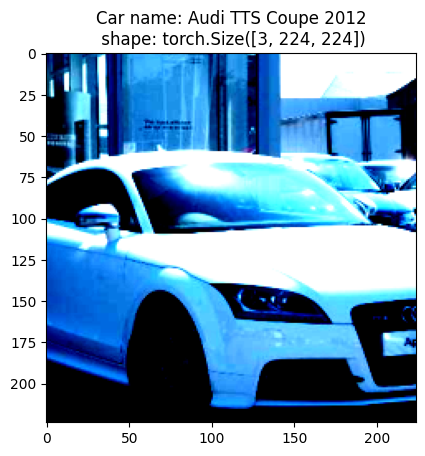

In [15]:
import matplotlib.pyplot as plt 

plt.figure()
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Car name: {class_names[label]}\n shape: {image.shape}")

C:\Users\admin\AppData\Local\Temp\ipykernel_16136\488913242.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows, cols, i)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] f

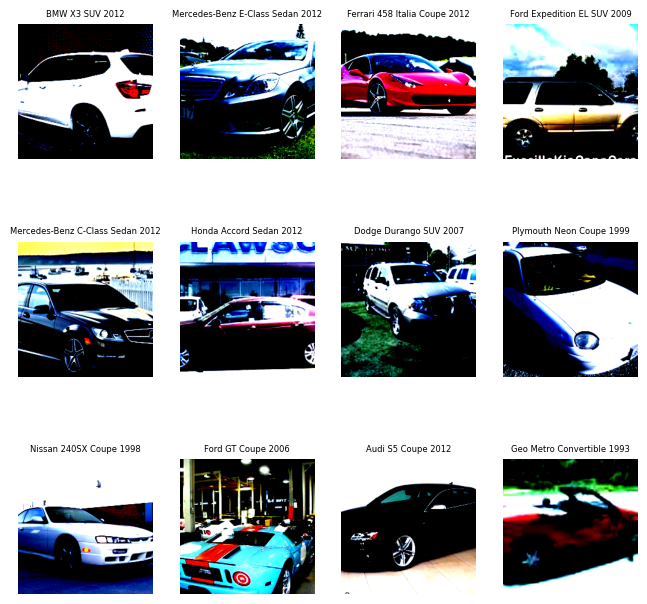

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot()

rows = 3
cols = 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    plt.subplot(rows, cols, i)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(class_names[label], fontsize=6)
    plt.axis(False)

In [17]:
from torchinfo import summary

summary(model=model_0, input_size=(32, 3, 224, 224), 
        col_names=["input_size", "output_size", "num_params", "trainable"],
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
GoogLeNet (GoogLeNet)                    [32, 3, 224, 224]         [32, 1000]                --                        True
├─BasicConv2d (conv1)                    [32, 3, 224, 224]         [32, 64, 112, 112]        --                        True
│    └─Conv2d (conv)                     [32, 3, 224, 224]         [32, 64, 112, 112]        9,408                     True
│    └─BatchNorm2d (bn)                  [32, 64, 112, 112]        [32, 64, 112, 112]        128                       True
├─MaxPool2d (maxpool1)                   [32, 64, 112, 112]        [32, 64, 56, 56]          --                        --
├─BasicConv2d (conv2)                    [32, 64, 56, 56]          [32, 64, 56, 56]          --                        True
│    └─Conv2d (conv)                     [32, 64, 56, 56]          [32, 64, 56, 56]          4,096                     True
│    

In [18]:
for params in model_0.parameters():
    params.requires_grad =False

In [19]:
model_0

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [20]:
from torch import nn
model_0.fc = nn.Sequential(
    nn.Flatten(),
    nn.Linear(
    in_features=1024,
    out_features=len(class_names),
    ),
)

In [21]:
model_0

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [22]:
from torchinfo import summary

summary(model=model_0, input_size=(32, 3, 224, 224), 
        col_names=["input_size", "output_size", "num_params", "trainable"],
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
GoogLeNet (GoogLeNet)                    [32, 3, 224, 224]         [32, 196]                 --                        Partial
├─BasicConv2d (conv1)                    [32, 3, 224, 224]         [32, 64, 112, 112]        --                        False
│    └─Conv2d (conv)                     [32, 3, 224, 224]         [32, 64, 112, 112]        (9,408)                   False
│    └─BatchNorm2d (bn)                  [32, 64, 112, 112]        [32, 64, 112, 112]        (128)                     False
├─MaxPool2d (maxpool1)                   [32, 64, 112, 112]        [32, 64, 56, 56]          --                        --
├─BasicConv2d (conv2)                    [32, 64, 56, 56]          [32, 64, 56, 56]          --                        False
│    └─Conv2d (conv)                     [32, 64, 56, 56]          [32, 64, 56, 56]          (4,096)                   Fal

In [23]:
from sklearn.metrics import accuracy_score


def train_model(
                dataloader :torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                model: torch.nn.Module,
                device: torch.device = device):
    
    train_acc, train_loss = 0, 0
    
    model.train()
    
    for batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        
        
                
        y_logit = model(x)
    
        loss = loss_fn(y_logit, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
        train_acc += ((y_pred == y).sum().item())/len(y_logit)
        
        
    train_acc = train_acc / len(dataloader)
    train_loss = train_loss / len(dataloader)
        
    return train_acc, train_loss

In [27]:
def test_model(
                dataloader :torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                model: torch.nn.Module,
                device: torch.device = device):
    
    test_acc, test_loss = 0, 0
    model.eval()
    with torch.inference_mode():
    
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
                  
            test_logit = model(x)
            
            
            loss = loss_fn(test_logit, y)
            test_loss += loss.item()
            
            test_pred = torch.argmax(test_logit, dim=1)
            test_acc += ((test_pred == y).sum().item())/len(test_logit)
            
    test_acc = test_acc / len(dataloader)
    test_loss = test_loss / len(dataloader)
        
    return test_acc, test_loss

In [28]:
from tqdm.auto import tqdm

def train(epochs: int,
          train_dataloader :torch.utils.data.DataLoader,
          test_dataloader :torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          model: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          device: torch.device = device):
    
    results = {
        "epochs" : [],
        "train_acc" : [],
        "train_loss" : [],
        "test_acc" : [],
        "test_loss" : [],
    }
    
    for i in tqdm(range(epochs)):
        train_acc, train_loss = train_model(dataloader=train_dataloader,
                    loss_fn=loss_fn,
                    optimizer=optimizer,
                    model=model,
                    device=device)
        
        test_acc, test_loss = test_model(dataloader=test_dataloader,
                    loss_fn=loss_fn,
                    model=model,
                    device=device)
        
        results["epochs"].append(i+1)
        results["train_acc"].append(train_acc)
        results["train_loss"].append(train_loss)
        results["test_acc"].append(test_acc)
        results["test_loss"].append(test_loss)
        
        print(f"Epoch: {i+1} | Train_acc: {train_acc:.3f} | Train_loss: {train_loss:.3f} | Test_acc: {test_acc:.3f} | Test_loss: {test_loss:.3f}")
            
    return results
        

In [29]:
# import os

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# !compute-sanitizer --error-exitcode 0
NUM_EPOCHS = 5
from timeit import default_timer as timer

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

start_time = timer()
model_0_results = train(epochs=NUM_EPOCHS,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        model=model_0,
                        optimizer=optimizer,
                        device=device)

end_time = timer()

print(f"Train time: {end_time - start_time} seconds.")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train_acc: 0.184 | Train_loss: 4.001
 Test_acc: 0.174 | Test_loss: 3.906
Epoch: 2 | Train_acc: 0.311 | Train_loss: 3.346
 Test_acc: 0.216 | Test_loss: 3.609
Epoch: 3 | Train_acc: 0.385 | Train_loss: 2.939
 Test_acc: 0.263 | Test_loss: 3.388
Epoch: 4 | Train_acc: 0.446 | Train_loss: 2.642
 Test_acc: 0.271 | Test_loss: 3.259
Epoch: 5 | Train_acc: 0.491 | Train_loss: 2.410
 Test_acc: 0.300 | Test_loss: 3.139
Train time: 720.1146100999999 seconds.


In [30]:
model_0_results

{'epochs': [1, 2, 3, 4, 5],
 'train_acc': [0.1843137254901961,
  0.3107843137254902,
  0.385171568627451,
  0.4462009803921569,
  0.4906862745098039],
 'train_loss': [4.000589769961787,
  3.3463379972121294,
  2.9392965148476993,
  2.642342861025941,
  2.4096418642530253],
 'test_acc': [0.17430004409171077,
  0.21610449735449735,
  0.26335152116402116,
  0.2713431437389771,
  0.2999889770723104],
 'test_loss': [3.905544658501943,
  3.6094871276900884,
  3.3876317701642473,
  3.2588337536842102,
  3.138954236393883]}

In [31]:
NUM_EPOCHS = 5
from timeit import default_timer as timer

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

start_time = timer()
model_0_SGD_results = train(epochs=NUM_EPOCHS,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        model=model_0,
                        optimizer=optimizer,
                        device=device)

end_time = timer()

print(f"Train time: {end_time - start_time} seconds.")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train_acc: 0.554 | Train_loss: 2.157
 Test_acc: 0.314 | Test_loss: 3.102
Epoch: 2 | Train_acc: 0.577 | Train_loss: 2.122
 Test_acc: 0.321 | Test_loss: 3.066
Epoch: 3 | Train_acc: 0.594 | Train_loss: 2.101
 Test_acc: 0.324 | Test_loss: 3.053
Epoch: 4 | Train_acc: 0.594 | Train_loss: 2.101
 Test_acc: 0.329 | Test_loss: 3.038
Epoch: 5 | Train_acc: 0.607 | Train_loss: 2.078
 Test_acc: 0.331 | Test_loss: 3.033
Train time: 695.8010383000001 seconds.


In [33]:
import torch
from pathlib import Path
def save_model(model :torch.nn.Module,
               model_name: str,
               target_dir: str = Path.cwd()
               ):
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parents=True,
                          exist_ok=True)
    
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model name must end with .pt or .pth"
    
    model_path = target_dir_path / model_name

    torch.save(obj=model, 
               f=model_path)
    
    print(f"Saving {model} as {model_name} in {target_dir_path}")

In [32]:
save_model(model=model_0,
           model_name= "model_0_SGD.pth",
           target_dir="models")

Saving GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True

In [34]:
save_model(model=model_0.state_dict(),
           model_name= "model_0_SGD_state_dict.pth",
           target_dir="models")

Saving OrderedDict([('conv1.conv.weight', tensor([[[[ 6.2279e-02,  1.3740e-01,  2.6673e-02,  ..., -2.9114e-03,
            1.0912e-02, -1.5283e-02],
          [ 5.9184e-02,  8.4274e-02, -3.2215e-01,  ...,  1.2585e-01,
            9.3206e-02, -4.8222e-03],
          [ 3.9570e-02, -3.1750e-01, -4.6701e-01,  ...,  4.5627e-01,
            1.2769e-02, -7.3509e-03],
          ...,
          [ 4.9440e-04,  2.5545e-01,  4.6266e-01,  ..., -4.4673e-01,
           -2.1622e-02,  1.5362e-02],
          [ 4.2668e-02,  1.2893e-01, -1.0582e-01,  ..., -6.6464e-02,
            8.5844e-02,  4.9707e-02],
          [-1.2421e-03,  2.7206e-02, -6.9249e-02,  ...,  5.5079e-02,
            4.8499e-02,  8.3361e-03]],

         [[ 4.7645e-02,  8.3684e-02, -8.1410e-02,  ...,  3.7322e-03,
            4.0263e-02,  6.4655e-03],
          [ 1.7548e-02, -1.1273e-02, -4.3168e-01,  ...,  2.1479e-01,
            1.8248e-01,  4.4537e-02],
          [-7.0397e-02, -4.5318e-01, -4.8846e-01,  ...,  6.3857e-01,
            5.53

In [ ]:
# weight = torchvision.models.EfficientNet_B1_Weights.DEFAULT
# model_1 = torchvision.models.efficientnet_b1(weights=weight)

Downloading: "https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth" to C:\Users\admin/.cache\torch\hub\checkpoints\efficientnet_b1-c27df63c.pth


  0%|          | 0.00/30.1M [00:00<?, ?B/s]

In [ ]:
# from torchinfo import summary

# summary(model=model_1,
#         input_size=(32, 3, 224, 224),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]         [32, 1000]                --                        True
├─Sequential (features)                                      [32, 3, 224, 224]         [32, 1280, 7, 7]          --                        True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]         [32, 32, 112, 112]        --                        True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]         [32, 32, 112, 112]        864                       True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]        [32, 32, 112, 112]        64                        True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]        [32, 32, 112, 112]        --                

In [ ]:
# model_1

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# for params in model_1.parameters():
#     params.requires_grad = False

In [ ]:
# model_1.classifier = nn.Sequential(
#     nn.Dropout(p=0.2, inplace=True),
#     nn.Linear(1280, 196)
# )

In [ ]:
# from torchinfo import summary

# summary(model=model_1,
#         input_size=(32, 3, 224, 224),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]         [32, 196]                 --                        Partial
├─Sequential (features)                                      [32, 3, 224, 224]         [32, 1280, 7, 7]          --                        False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]         [32, 32, 112, 112]        --                        False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]         [32, 32, 112, 112]        (864)                     False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]        [32, 32, 112, 112]        (64)                      False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]        [32, 32, 112, 112]        --         

In [ ]:
# TRANSFORM = weight.transforms()

# train_data = datasets.StanfordCars(root=root_dir,
#                                    split='train',
#                                    transform=TRANSFORM,
#                                    download=True)

# test_data = datasets.StanfordCars(root=root_dir,
#                                    split='test',
#                                    transform=TRANSFORM,
#                                    download=True)

# BATCH_SIZE = 32
# train_dataloader = DataLoader(dataset=train_data,
#                               batch_size=32,
#                               shuffle=True,
#                               )
# test_dataloader = DataLoader(dataset=test_data,
#                               batch_size=32,
#                               shuffle=False,
#                               )

In [ ]:
# NUM_EPOCHS = 5
# from timeit import default_timer as timer

# loss_fn = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# start_time = timer()
# model_1_results = train(epochs=NUM_EPOCHS,
#                         train_dataloader=train_dataloader,
#                         test_dataloader=test_dataloader,
#                         loss_fn=loss_fn,
#                         model=model_1,
#                         optimizer=optimizer,
#                         device=device)

# end_time = timer()

# print(f"Train time: {(end_time - start_time):.3f} seconds.")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1, Train_acc: 0.005 |Train_loss: 5.279
 Test_acc: 0.005 | Test_loss: 5.279
Epoch: 2, Train_acc: 0.005 |Train_loss: 5.280
 Test_acc: 0.005 | Test_loss: 5.279
Epoch: 3, Train_acc: 0.004 |Train_loss: 5.281
 Test_acc: 0.006 | Test_loss: 5.279
Epoch: 4, Train_acc: 0.004 |Train_loss: 5.281
 Test_acc: 0.005 | Test_loss: 5.279
Epoch: 5, Train_acc: 0.004 |Train_loss: 5.280
 Test_acc: 0.005 | Test_loss: 5.279
Train time: 755.282 seconds.


In [ ]:
# model_1_results

{'epochs': [5, 5, 5, 5, 5],
 'train_acc': [0.0045343137254901964,
  0.005269607843137255,
  0.00428921568627451,
  0.004166666666666667,
  0.004166666666666667],
 'train_loss': [5.2792003631591795,
  5.279846686942904,
  5.2806493646958295,
  5.280501174926758,
  5.280370583253748],
 'test_acc': [0.004836309523809524,
  0.005084325396825397,
  0.005704365079365079,
  0.00533234126984127,
  0.004712301587301587],
 'test_loss': [5.27917678583236,
  5.27888011743152,
  5.278713090079171,
  5.2787323830619695,
  5.2790914925317916]}

In [35]:
weight_3 = torchvision.models.VGG16_Weights.DEFAULT
model_3 = torchvision.models.vgg16(weights=weight_3)

In [45]:
TRANSFORM = weight_3.transforms()

train_data = datasets.StanfordCars(root=root_dir,
                                   split='train',
                                   transform=TRANSFORM,
                                   download=True)

test_data = datasets.StanfordCars(root=root_dir,
                                   split='test',
                                   transform=TRANSFORM,
                                   download=True)

BATCH_SIZE = 16
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=64,
                              shuffle=True,
                              )
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=64,
                              shuffle=False,
                              )

In [46]:
torch.cuda.empty_cache()

In [47]:
summary(model=model_3, 
        input_size=(64, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
VGG (VGG)                                [64, 3, 224, 224]         [64, 196]                 --                        Partial
├─Sequential (features)                  [64, 3, 224, 224]         [64, 512, 7, 7]           --                        False
│    └─Conv2d (0)                        [64, 3, 224, 224]         [64, 64, 224, 224]        (1,792)                   False
│    └─ReLU (1)                          [64, 64, 224, 224]        [64, 64, 224, 224]        --                        --
│    └─Conv2d (2)                        [64, 64, 224, 224]        [64, 64, 224, 224]        (36,928)                  False
│    └─ReLU (3)                          [64, 64, 224, 224]        [64, 64, 224, 224]        --                        --
│    └─MaxPool2d (4)                     [64, 64, 224, 224]        [64, 64, 112, 112]        --                        --
│  

In [48]:
for params in model_3.parameters():
    params.requires_grad = False

In [49]:
model_3

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [50]:
model_3.classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=512, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=512, out_features=512, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=512, out_features=512, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=196, bias=True)
)

In [51]:
torch.cuda.empty_cache()

In [52]:
!nvidia-smi

Wed Mar  8 13:37:19 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.18                 Driver Version: 531.18       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 L...  WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   56C    P8                8W /  N/A|   1576MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [53]:
summary(model=model_3, 
        input_size=(16, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        row_settings=["var_names"]
        )

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
VGG (VGG)                                [16, 3, 224, 224]         [16, 196]                 --                        Partial
├─Sequential (features)                  [16, 3, 224, 224]         [16, 512, 7, 7]           --                        False
│    └─Conv2d (0)                        [16, 3, 224, 224]         [16, 64, 224, 224]        (1,792)                   False
│    └─ReLU (1)                          [16, 64, 224, 224]        [16, 64, 224, 224]        --                        --
│    └─Conv2d (2)                        [16, 64, 224, 224]        [16, 64, 224, 224]        (36,928)                  False
│    └─ReLU (3)                          [16, 64, 224, 224]        [16, 64, 224, 224]        --                        --
│    └─MaxPool2d (4)                     [16, 64, 224, 224]        [16, 64, 112, 112]        --                        --
│  

In [55]:
import torch
torch.cuda.empty_cache()

NUM_EPOCHS = 10
from timeit import default_timer as timer

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

start_time = timer()
model_0_results = train(epochs=NUM_EPOCHS,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        model=model_0,
                        optimizer=optimizer,
                        device=device)

end_time = timer()

print(f"Train time: {end_time - start_time} seconds.")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | Train_acc: 0.631 | Train_loss: 1.998
 Test_acc: 0.335 | Test_loss: 3.014
Epoch: 2 | Train_acc: 0.636 | Train_loss: 1.984
 Test_acc: 0.335 | Test_loss: 3.015
Epoch: 3 | Train_acc: 0.637 | Train_loss: 1.985
 Test_acc: 0.336 | Test_loss: 3.006
Epoch: 4 | Train_acc: 0.639 | Train_loss: 1.981
 Test_acc: 0.338 | Test_loss: 3.002
Epoch: 5 | Train_acc: 0.639 | Train_loss: 1.984
 Test_acc: 0.338 | Test_loss: 3.006
Epoch: 6 | Train_acc: 0.641 | Train_loss: 1.971
 Test_acc: 0.342 | Test_loss: 3.008
Epoch: 7 | Train_acc: 0.644 | Train_loss: 1.972
 Test_acc: 0.339 | Test_loss: 3.003
Epoch: 8 | Train_acc: 0.646 | Train_loss: 1.971
 Test_acc: 0.343 | Test_loss: 2.999
Epoch: 9 | Train_acc: 0.647 | Train_loss: 1.964
 Test_acc: 0.341 | Test_loss: 3.000
Epoch: 10 | Train_acc: 0.642 | Train_loss: 1.972
 Test_acc: 0.341 | Test_loss: 3.003
Train time: 1236.0315842999998 seconds.


In [56]:
save_model(model=model_3,
           model_name="model_3.pth",
           target_dir="models")

save_model(model=model_3.state_dict(),
           model_name="model_3_state_dict.pth",
           target_dir="models")

Saving VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil